In [1]:
# rm(list=ls())
options(OutDec = ",") 
#===================================================================
# Exemplo de gastos mensais com cartão de crédito.
#===================================================================
# Análise.
#===================================================================
library(MASS)
dataxy       <- read.table("../dados/exemplo_14.txt",header=T)
print(dataxy)

    MDR Acc Age Income  Avgexp Ownrent Selfempl
1     0   1  38   4,52  124,98       1        0
2     0   1  33   2,42    9,85       0        0
3     0   1  34   4,50   15,00       1        0
4     0   1  31   2,54  137,87       0        0
5     0   1  32   9,79  546,50       1        0
6     0   1  23   2,50   92,00       0        0
7     0   1  28   3,96   40,83       0        0
8     0   1  29   2,37  150,79       1        0
9     0   1  37   3,80  777,82       1        0
10    0   1  28   3,20   52,58       0        0
11    0   1  31   3,95  256,66       1        0
12    0   0  42   1,98    0,00       1        0
13    0   0  30   1,73    0,00       1        0
14    0   1  29   2,45   78,87       1        0
15    0   1  35   1,91   42,62       1        0
16    0   1  41   3,20  335,43       1        0
17    0   1  40   4,00  248,72       1        0
18    7   0  30   3,00    0,00       1        0
19    0   1  40  10,00  548,03       1        1
20    3   0  46   3,40    0,00       0  

In [2]:
#===================================================================
# Definindo as variáveis do modelo.
#===================================================================
avgexp       <- dataxy[dataxy[,5]>0,5]
idade        <- dataxy[dataxy[,5]>0,3]
renda        <- dataxy[dataxy[,5]>0,4]
renda2       <- renda^2
casa         <- dataxy[dataxy[,5]>0,6]
n            <- length(avgexp)

In [3]:
#===================================================================
# Ajuste da regressão linear por mínimos quadrados.
#===================================================================
fity <- lm(avgexp ~ idade + casa + renda + renda2 )
print(summary(fity))


Call:
lm(formula = avgexp ~ idade + casa + renda + renda2)

Residuals:
    Min      1Q  Median      3Q     Max 
-429,03 -130,36  -51,10   53,98 1460,62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -237,147    199,352  -1,190  0,23841   
idade         -3,082      5,515  -0,559  0,57814   
casa          27,941     82,922   0,337  0,73721   
renda        234,347     80,366   2,916  0,00482 **
renda2       -14,997      7,469  -2,008  0,04870 * 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 284,8 on 67 degrees of freedom
Multiple R-squared:  0,2436,	Adjusted R-squared:  0,1984 
F-statistic: 5,394 on 4 and 67 DF,  p-value: 0,0007952



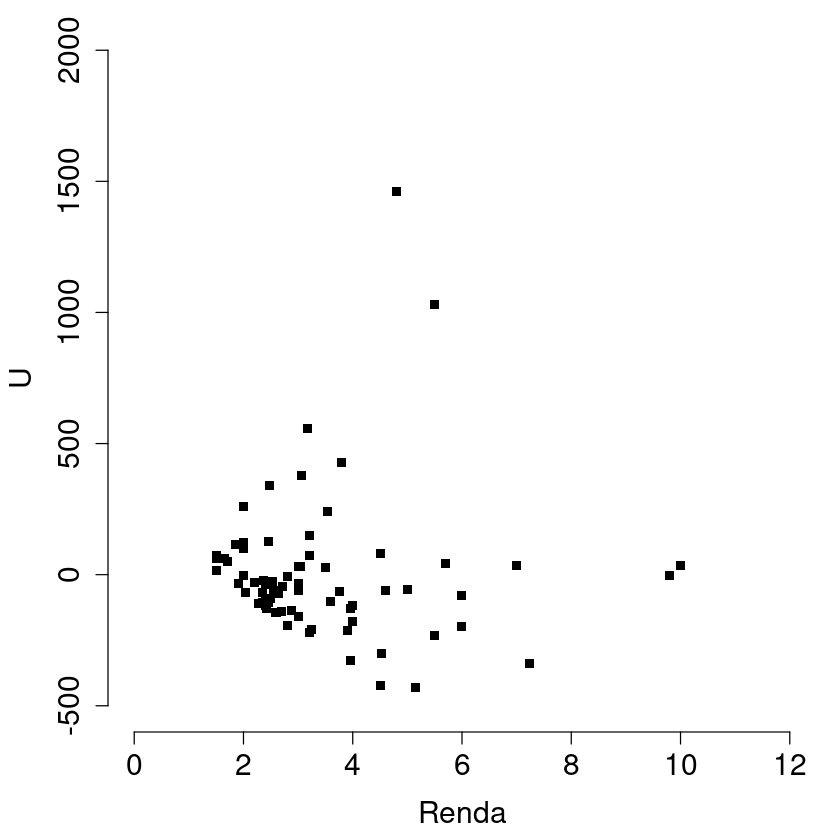

In [4]:
#===================================================================
# Dispersão entre renda e resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(renda,fity$res,pch=15,xlab="Renda",ylab="U",xlim=c(0,12),
     ylim=c(-500,2000))

In [5]:
#===================================================================
# Estimador de White e outros.
#===================================================================
X            <- cbind(rep(1,n),idade,casa,renda,renda2) 
XtXinv       <- solve(t(X)%*%X)
S0           <- matrix(0,5,5)
DM2          <- matrix(0,5,5)
for(i in 1:n){
	S0  <- S0 + (fity$res[i]^2)*(X[i,]%*%t(X[i,]))
	mii <- 1 - t(X[i,])%*%XtXinv%*%X[i,]
	DM2 <- DM2 + c((fity$res[i]^2)/mii)*(X[i,]%*%t(X[i,]))
}
S0           <- S0/n
DM2          <- DM2/n
varbw        <- n*XtXinv%*%S0%*%XtXinv
varbdm       <- n*XtXinv%*%DM2%*%XtXinv
sdbw         <- sqrt(diag(varbw))
sdbdm        <- sqrt(diag(varbdm))

B            <- cbind(NA,mean(idade),mean(casa),mean(renda),NA)
B            <- rbind(B,fity$coef)
B            <- rbind(B,sqrt(diag(vcov(fity))))
B            <- rbind(B,B[2,]/B[3,])
B            <- rbind(B,sdbw)
B            <- rbind(B,sdbw*sqrt(n/(n-5)))
B            <- rbind(B,sdbdm)
row.names(B) <- c("Media Amostral","Coeficiente","Erro Padrao","Razao t",
                  "Erro Padrao White","D. e M. (1)","D. e M. (2)")
print(B)

                  (Intercept)      idade       casa      renda     renda2
Media Amostral             NA 31,2777778  0,3750000   3,437083         NA
Coeficiente       -237,146514 -3,0818140 27,9409084 234,347027 -14,996844
Erro Padrao        199,351665  5,5147165 82,9223236  80,365950   7,469337
Razao t             -1,189589 -0,5588345  0,3369528   2,915999  -2,007788
Erro Padrao White  212,990530  3,3016612 92,1877767  88,866352   6,944563
D. e M. (1)        220,794952  3,4226411 95,5657314  92,122602   7,199027
D. e M. (2)        221,088927  3,4477148 95,6721114  92,083684   7,199538


In [6]:
#===================================================================
# Teste de White.
#===================================================================
w            <- fity$res^2
renda4       <- renda^4
idade2       <- idade^2
fitw   <- lm(w ~ idade + casa + renda + renda2 
	 + idade2 + renda4
	 + idade:casa + idade:renda  + idade:renda2
	 + casa:renda + casa:renda2  + renda:renda2)
print("===========================================================")
print(summary(fitw))
R2w          <- 1-sum(fitw$res^2)/sum((w-mean(w))^2)
WS           <- n*R2w
print("===========================================================")
print(c(WS > qchisq(0.95,13-1))) 

[1] "==========================================================="

Call:
lm(formula = w ~ idade + casa + renda + renda2 + idade2 + renda4 + 
    idade:casa + idade:renda + idade:renda2 + casa:renda + casa:renda2 + 
    renda:renda2)

Residuals:
    Min      1Q  Median      3Q     Max 
-403431  -83907   -8912   36958 1675167 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1637390,4  1290979,7   1,268   0,2097  
idade            5366,2    48893,8   0,110   0,9130  
casa           812036,8   991630,2   0,819   0,4161  
renda        -2021697,6  1053559,1  -1,919   0,0598 .
renda2         669055,3   365666,7   1,830   0,0724 .
idade2           -424,1      627,5  -0,676   0,5018  
renda4           3762,7     2277,4   1,652   0,1038  
idade:casa       4661,7    14424,6   0,323   0,7477  
idade:renda     11499,9    15614,3   0,736   0,4643  
idade:renda2    -1093,3     1568,1  -0,697   0,4884  
casa:renda    -510192,3   469792,6  -1,086   0,2819  
casa:renda

In [7]:
#===================================================================
# Teste de Breusch-Pagan e Koenker-Basset
#===================================================================
Z            <- cbind(rep(1,n),renda,renda2) # duas variaveis
fitLM        <- lm(avgexp ~ renda + renda2 )          
g            <- (fitLM$res^2)/mean(fitLM$res^2) - 1
LM           <- 0.5*t(g)%*%Z%*%solve(t(Z)%*%Z)%*%t(Z)%*%g
print("===========================================================")
print(c(LM > qchisq(0.95,2))) 
print("===========================================================")
print(1-pchisq(LM,2)) # valor-p

[1] "==========================================================="
[1] TRUE
[1] "==========================================================="
             [,1]
[1,] 1,165549e-09


In [8]:
#===================================================================
# Teste de Koenker-Basset.
#===================================================================
V            <- mean( ((fitLM$res^2) - mean(fitLM$res^2))^2 )
u            <- fitLM$res^2
ubarra       <- mean(fitLM$res^2)
LM2          <- (1/V)*t(u-ubarra)%*%Z%*%solve(t(Z)%*%Z)%*%t(Z)%*%(u-ubarra)
print("===========================================================")
print(c(LM2 > qchisq(0.95,2)))
print("===========================================================")
print(1-pchisq(LM2,2)) # p-valor

[1] "==========================================================="
[1] TRUE
[1] "==========================================================="
           [,1]
[1,] 0,04214613


In [9]:
#===================================================================
# A diferença entre LM e LM2 sugere falta de normalidade dos dados.
#===================================================================

In [10]:
#===================================================================
# Fim
#===================================================================